### Visualizing the distribution of the observations

### Load the required libraries

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
# sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions
from YearPlotter import YearPlotter

### Read the data frame from pickle file

data_dir='../../Data/Weather'
file_index='SSSSSSBB'
# file_index='SSSSSSBB_ori'
# file_index= 'BBBSBBBB'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

#read data
filename=data_dir+'/US_Weather_%s.parquet'%file_index

df=sqlContext.read.parquet(filename)
print df.count()
df.show(5)

Populating the interactive namespace from numpy and matplotlib
keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12836
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|    371.9| 33.5333|-113.1667|       TMAX|USC00023852|    13|[B0 58 A0 57 28 5...|1970.0|SSSSSSBB|
|    371.9| 33.5333|-113.1667|       TMAX|USC00023852|    14|[10 5A 08 59 30 5...|1971.0|SSSSSSBB|
|    371.9| 33.5333|-113.1667|       TMAX|USC00023852|    46|[E8 59 40 5A 38 5...|1972.0|SSSSSSBB|
|    371.9| 33.5333|-113.1667|       TMAX|USC00023852|    18|[A0 56 B0 58 B0 5...|1973.0|SSSSSSBB|
|    371.9| 33.5333|-113.1667|       TMAX|USC00023852|    21|[E0 58 40 56 58 5...|1974.0|SSSSSSBB|
+---------+--------+---------+-----------+-----------+------+-------------

### Select data for a particular station and measurement type

In [7]:
sqlContext.registerDataFrameAsTable(df,'weather')
Query2="SELECT distinct station,latitude,longitude FROM weather order by latitude"
print Query2
df1 = sqlContext.sql(Query2)
print df1.count(),'rows'
df1.show(157)

Query2="SELECT distinct year FROM weather order by year"
print Query2
df1 = sqlContext.sql(Query2)
print df1.count(),'rows'
df1.show(112)


# Query="SELECT * FROM weather\n\tWHERE measurement='%s' and latitude='%s' and longitude = '%s' "%('TOBS','33.9792','-112.7403')

# # Query="SELECT * FROM weather\n\tWHERE measurement='%s'"%('TMAX')

# print Query
# df1 = sqlContext.sql(Query)
# print df1.count(),'rows'
# df1.show(200)
# rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
# print rows[0:10]
# T=np.vstack(rows)
# # T=T/10.  # scaling to make the temperature be in centingrates
# shape(T)


# print T[0]

SELECT distinct station,latitude,longitude FROM weather order by latitude
157 rows
+-----------+--------+---------+
|    station|latitude|longitude|
+-----------+--------+---------+
|USC00024829| 33.3369|-112.1472|
|US1AZMR0032| 33.3404|-111.9303|
|USW00053156| 33.3472|-112.0833|
|USC00043690|   33.35|-116.0167|
|US1AZMR0326| 33.3504|-112.0945|
|US1AZMR0126| 33.3535|-111.9264|
|US1AZMR0197| 33.3552|-111.8461|
|US1AZMR0048|  33.358|-111.8563|
|US1AZMR0260|  33.368|-111.8622|
|US1AZMR0255| 33.3718|-111.9059|
|US1AZMR0280|  33.372| -111.812|
|US1AZMR0075| 33.3741|-111.8053|
|USC00021026| 33.3761|-112.5828|
|USC00028112| 33.3814|  -112.07|
|USC00029015| 33.3833|-111.9667|
|USC00023573| 33.3833|-112.0667|
|USC00028494| 33.3833|-111.9333|
|US1AZMR0034| 33.3925|-112.1437|
|US1AZMR0044| 33.3964|-111.7903|
|US1AZMR0096| 33.3978|-111.7501|
|US1AZMR0267| 33.4045|-111.9165|
|US1AZMR0170| 33.4066|-112.4485|
|US1AZMR0222| 33.4094| -112.181|
|USC00025467| 33.4114|-111.8183|
|US1AZMR0253| 33.4174|-112

### Script for plotting yearly plots

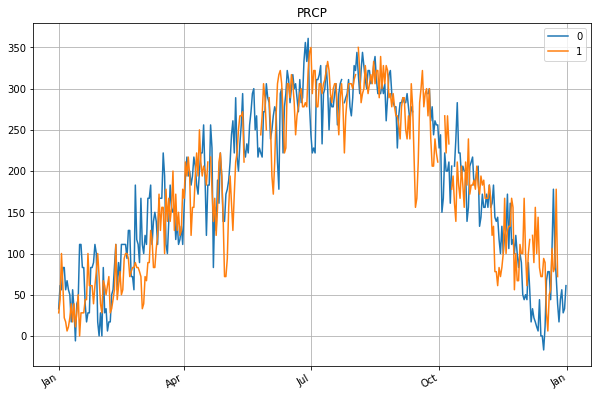

In [49]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(T[:2,:].transpose(),fig,ax,title='PRCP')
#title('A sample of graphs');

### Distribution of missing observations
The distribution of missing observations is not uniform throughout the year. We visualize it below.

In [34]:
def plot_pair(pair,func,name,ylabels,label):
    j=0
    fig,X=subplots(1,2,figsize=(16,6))
    axes=X.reshape(2)
    for m,ylabel in zip(pair,ylabels):
        axis = axes[j]
        j+=1
        func(m,fig,axis,ylabel,label)
    fig.savefig('hw5_figures/' + name + '.png')
    
def plot_valid(m,fig,axis,ylabel,label):
    valid_m=STAT[m]['NE']
    YP.plot(valid_m,fig,axis,ylabel,title='valid-counts '+m,labels = label)
    

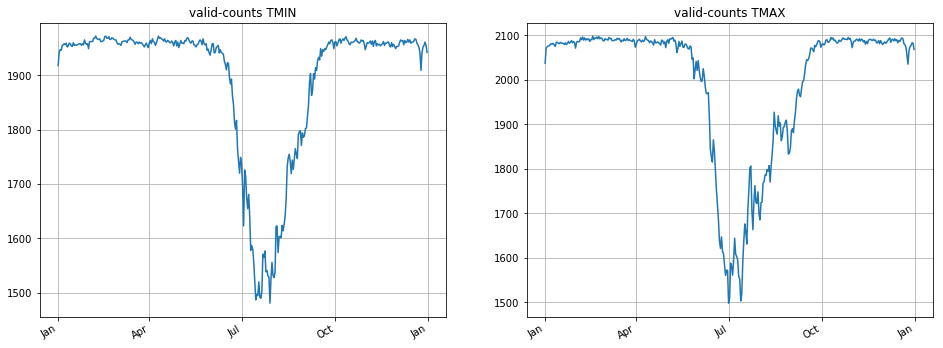

In [458]:
# print STAT
plot_pair(['TMIN','TMAX'],plot_valid)

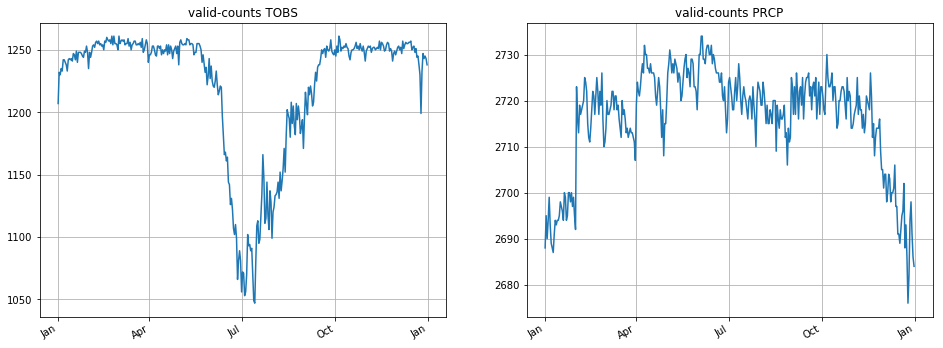

In [459]:
plot_pair(['TOBS','PRCP'],plot_valid)

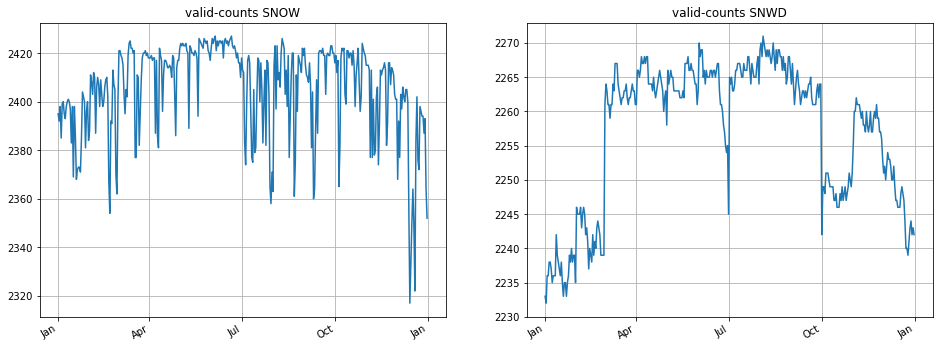

In [460]:
plot_pair(['SNOW', 'SNWD'],plot_valid)

### Plots of mean and std of observations

In [30]:
def plot_mean_std(m,fig,axis,ylabel,label):
    if m in ['TMIN','TMAX','TOBS']:
        mean=STAT[m]['Mean']/10
        std=np.sqrt(STAT[m]['Var'])/10 
    else:
        mean=STAT[m]['Mean']
        std=np.sqrt(STAT[m]['Var']) 
    graphs=np.vstack([mean-std,mean,mean+std]).transpose()
    YP.plot(graphs,fig,axis,ylabel,title='Mean+-std   '+m, labels=label)

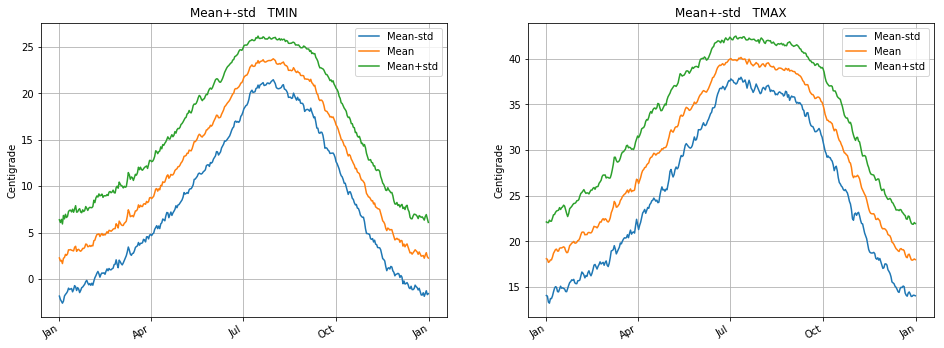

In [35]:
plot_pair(['TMIN','TMAX'],plot_mean_std,'TMAX_TMIN',['Centigrade','Centigrade'],['Mean-std', 'Mean', 'Mean+std'])

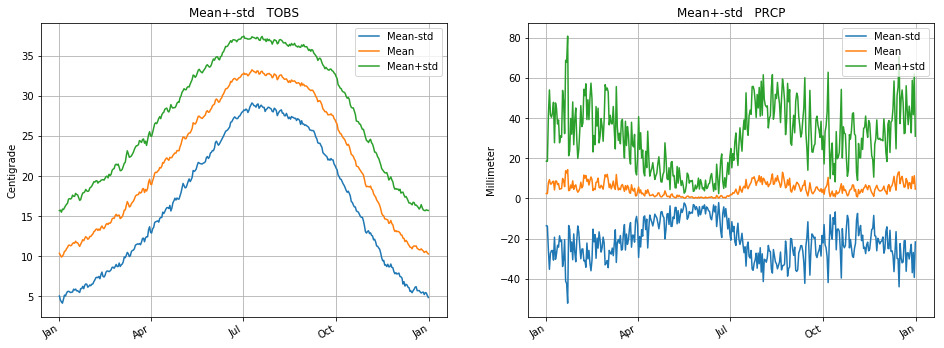

In [36]:
plot_pair(['TOBS','PRCP'],plot_mean_std,'TOBS_PRCP',['Centigrade','Millimeter'],['Mean-std', 'Mean', 'Mean+std'])

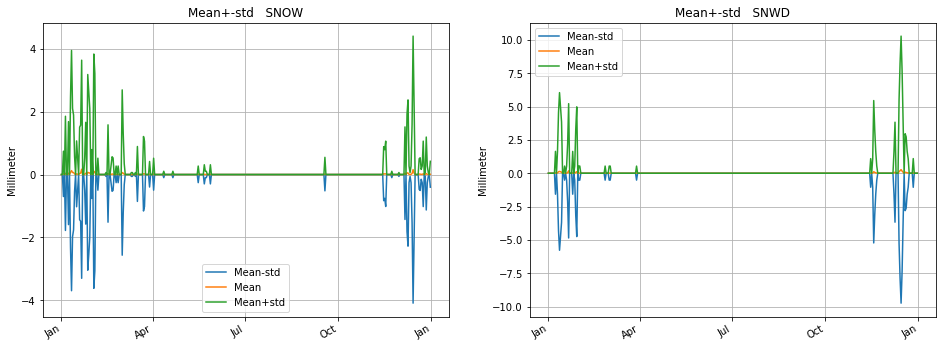

In [37]:
plot_pair(['SNOW', 'SNWD'],plot_mean_std,'SNOW_SNWD',['Millimeter','Millimeter'],['Mean-std', 'Mean', 'Mean+std'])

### plotting top 3 eigenvectors

In [19]:
def plot_eigen(m,fig,axis,ylabel,label):
    EV=STAT[m]['eigvec']
    YP.plot(EV[:,:4],fig,axis,ylabel,title='Top Eigenvectors '+m,labels=label)

In [23]:
measurements=['TMAX', 'SNOW', 'SNWD', 'TMIN', 'PRCP', 'TOBS']

In [24]:
for name in measurements:
    eigvec = STAT[name]['eigvec']
    eigval = STAT[name]['eigval']


    # print sorted(eigval)

    pair = [(val, i) for i,val in enumerate(eigval)]

    pair.sort(key=lambda x: x[0])
    pair = pair[::-1]

    eigval_sorted = []
    eigvec_sorted = []
    for (val, i) in pair:
        eigval_sorted.append(val if val > 0 else 0)
#         eigval_sorted.append(val)
        eigvec_sorted.append(eigvec[:,i])
    STAT[name]['eigvec'] = (np.array(eigvec_sorted).T)
    STAT[name]['eigval'] = (np.array(eigval_sorted))

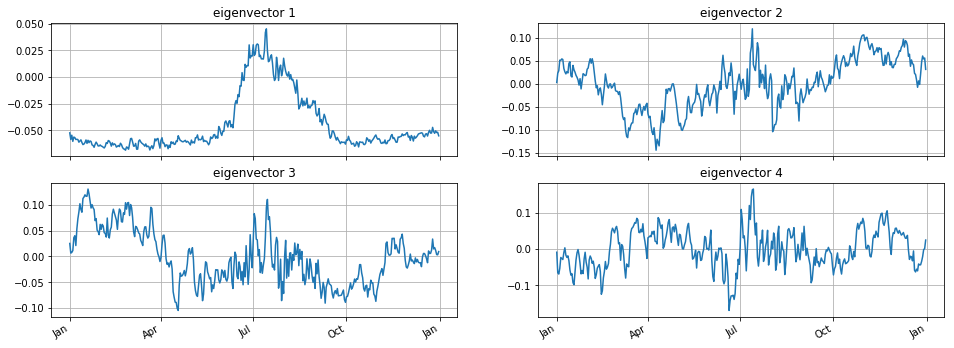

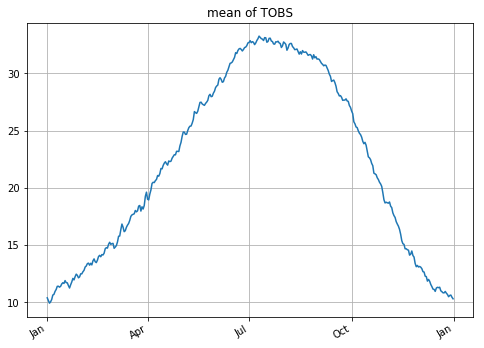

In [25]:
def plot_eig(m,number,name):
    EV=STAT[m]['eigvec']
    j=0
    fig,X=subplots(2,2,figsize=(16,6))
    axes=X.reshape(4)
    for m in range(number):
        axis = axes[j]
        j+=1
        YP.plot(EV[:,j-1],fig,axis,'',title = 'eigenvector '+ str(j),labels=[])
#     fig.savefig('hw5_figures/' + name + '.png')
    
plot_eig('TOBS',4, 'TOBS_eigen')

def plot_single_mean(m,name):
    EV=STAT[m]['Mean']/10
    fig,X=subplots(1,1,figsize=(8,6))
    YP.plot(EV,fig,X,'',title = 'mean of '+ m,labels=[])
#     fig.savefig('hw5_figures/' + name + '.png')
    
plot_single_mean('TOBS','TOBS_mean')

In [33]:
plot_pair(['TMIN','TMAX'],plot_eigen)

TypeError: plot_pair() takes exactly 5 arguments (2 given)

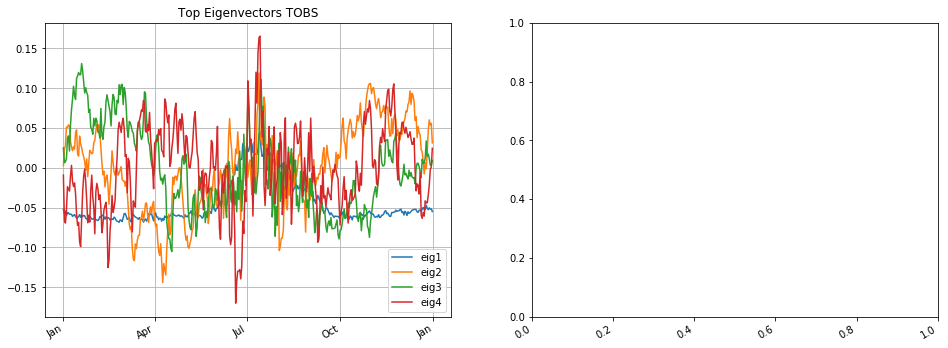

In [78]:
# plot_pair(['TOBS','PRCP'],plot_eigen)
plot_pair(['TOBS'],plot_eigen, 'TOBS_eigen', ['',''],['eig1','eig2','eig3','eig4'])

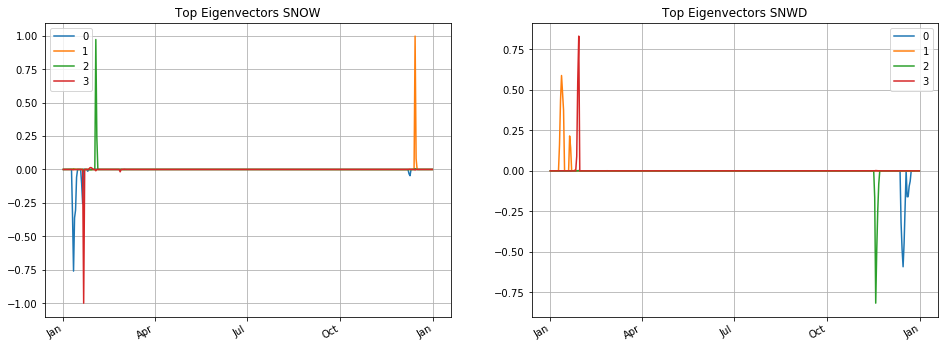

In [532]:
plot_pair(['SNOW', 'SNWD'],plot_eigen)

### Script for plotting percentage of variance explained

In [27]:
def pltVarExplained(j):
    subplot(1,3,j)
    EV=STAT[m]['eigval']
#     EV = sorted(EV)[::-1]
    k=10
    plot(([0,]+list(cumsum(EV[:k])))/sum(EV))
    title('Percentage of Variance Explained for '+ m)
    ylabel('Percentage of Variance')
    xlabel('# Eigenvector')
    grid()
    
    

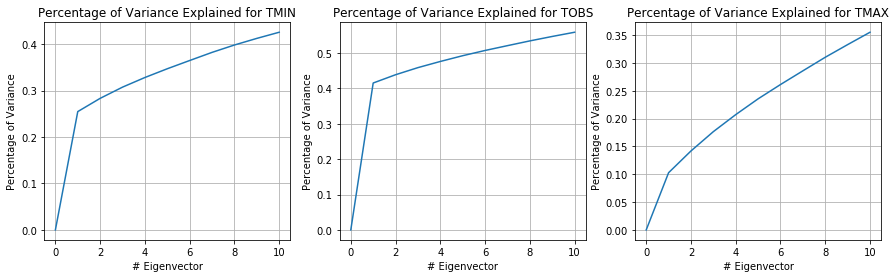

In [28]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['TMIN', 'TOBS', 'TMAX']: #,
    pltVarExplained(j)
    j+=1
# savefig('hw5_figures/var_explain_10_1.png')

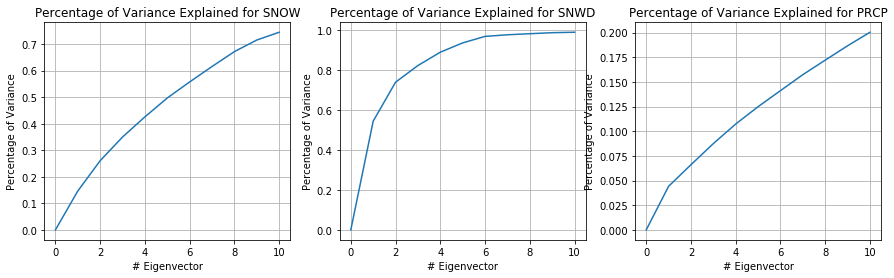

In [29]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['SNOW', 'SNWD', 'PRCP']:
    pltVarExplained(j)
    j+=1 
# savefig('hw5_figures/var_explain_10_2.png')

In [19]:
#sc.stop()